In [3]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [6]:
# 데이터 불러오기 - 자동차 가격 예측
corolla = pd.read_csv('./csv/ToyotaCorolla.csv')
corolla.head() 

# 명목형 변수(dummy variable)인 'Fuel_Type'은 따로 전처리 필요

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [7]:
# 데이터 수와 변수의 수 확인하기
nCar = corolla.shape[0]
nVar = corolla.shape[1]

print(nCar, nVar)

1436 37


## 범주형 변수를 이진형 변수로 변환

In [12]:
## 가변수 생성
print(corolla.Fuel_Type.unique()) # 어떤 값들이 있는지
dummy_p = np.repeat(0, nCar) # 데이터 수만큼 0을 만들어
dummy_d = np.repeat(0, nCar)
dummy_c = np.repeat(0, nCar)

['Diesel' 'Petrol' 'CNG']


In [11]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
# 0으로 이루어져있는 것 중에서 'Diesel, Petrol, CNG'이 있는 위치 찾아서 그 위치에 1 넣음
p_idx = np.array(corolla.Fuel_Type == 'Petrol')
c_idx = np.array(corolla.Fuel_Type == 'CNG')
d_idx = np.array(corolla.Fuel_Type == 'Diesel')

In [17]:
dummy_p[p_idx] = 1
dummy_c[c_idx] = 1
dummy_d[d_idx] = 1

In [18]:
dummy_p

array([0, 0, 0, ..., 1, 1, 1])

## 불필요한 변수 제거 및 가변수 추가


In [37]:
Fuel = pd.DataFrame({'Petrol' : dummy_p, 'Diesel' : dummy_d, 'CNG' : dummy_c})

In [38]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [50]:
corolla_ = corolla.drop(['Id', 'Model', 'Fuel_Type'], axis=1, inplace=False)
mlr_data = pd.concat((corolla_, Fuel), 1)
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [51]:
# bias 추가 (상수항)
mlr_data = sm.add_constant(mlr_data, has_constant="add") # 변수 덮어씌울 때는 조심해야돼
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [52]:
feature_columns = list(mlr_data.columns.difference(['Price'])) # 특정 변수(여기선 'Price')만을 제외하고 가져올 수 있음
# feature_columns가 y('price')를 제외한 x 변수들이 되겠지

X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [53]:
# Train the MLR / 회귀모델적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()


In [55]:
## R2가 굉장히 높고, 대부분의 변수들이 유의
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     325.1
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:58:43   Log-Likelihood:                -8408.6
No. Observations:                1005   AIC:                         1.689e+04
Df Residuals:                     971   BIC:                         1.705e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -133.8389    131.352     -1.019      0.308    -391.605     123.927
Age_08_04         -115.6239      3.940    -29.345      0.000    -123.356    -107.892
Airbag_1            66.9523    276.547      0.242      0.809    -475.745     609.650
Airbag_2           -92.5696    135.772     -0.682      0.496    -359.010     173.871
Airco              228.8033     91.523      2.500      0.013      49.198     408.408
Automatic          181.6912    152.091      1.195      0.233    -116.775     480.157
Automatic_airco   2448.4435    205.426     11.919      0.000    2045.313    2851.574
BOVAG_Guarantee    606.7091    129.633      4.680      0.000     352.315     861.103
Backseat_Divider  -331.9437    132.548     -2.504      0.012    -592.057     -71.830
Boardcomputer     -347.9595    118.359     -2.940      0.003    -580.227    -115.692
CD_Player          186.6191    102.096      1.828      0.068     -13.735     386.973
CNG              -1786.7739    305.902     -5.841      0.000   -2387.080   -1186.468
Central_Lock      -102.1170    151.270     -0.675      0.500    -398.970     194.736
Cylinders           -0.0336      0.003    -13.317      0.000      -0.039      -0.029
Diesel             917.7776    322.251      2.848      0.004     285.389    1550.166
Doors               -9.9459     42.336     -0.235      0.814     -93.026      73.134
Gears             -159.8223    211.454     -0.756      0.450    -574.782     255.137
Guarantee_Period    73.1255     14.021      5.216      0.000      45.611     100.640
HP                  42.3368      5.715      7.408      0.000      31.121      53.552
KM                  -0.0148      0.001    -11.428      0.000      -0.017      -0.012
Met_Color           33.5302     75.535      0.444      0.657    -114.700     181.760
Metallic_Rim       158.4859     93.894      1.688      0.092     -25.772     342.744
Mfg_Month          -95.2789     10.382     -9.177      0.000    -115.653     -74.905
Mfg_Year             0.7357      0.996      0.738      0.460      -1.219       2.691
Mfr_Guarantee      230.8939     74.301      3.108      0.002      85.085     376.703
Mistlamps           17.7168    111.633      0.159      0.874    -201.353     236.786
Petrol             868.9879    263.384      3.299      0.001     352.120    1385.856
Power_Steering     130.8311    285.516      0.458      0.647    -429.468     691.130
Powered_Windows    474.2726    151.151      3.138      0.002     177.652     770.893
Quarterly_Tax       17.6632      2.028      8.711      0.000      13.684      21.642
Radio              610.3279    772.452      0.790      0.430    -905.540    2126.195
Radio_cassette    -784.7185    773.468     -1.015      0.311   -2302.581     733.144
Sport_Model        164.7209     91.764      1.795      0.073     -15.357     344.799
Tow_Bar           -175.

## VIF를 통한 다중공선성 확인 

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

'''
inf 는 infinite (굉장히 큰 값이겠지)
'Age_08_04'가 p-value는 0.000으로 유의미하다고 나왔는데 다중공산성이 굉장히 크게 나왔지
이런 경우에 변수 제거를 해야할까 말아야할까? 사실 제거하지 않는게 맞다고 보는게 나음
즉 다른 변수들로 'Age_08_04'를 설명할 수 있지만 그래도 이 변수가 y를 설명하는데 중요한 영향을 끼치고있다고 볼수있음

'Radio'와 'Radio_casette'중 하나를 지워보고 다시 회귀분석 해보자
근데 이번 시간에는 하나씩 지우면서 결과확인은 하지않고
변수선택법을 통해서 다시 모델링 해보는 걸로
'''


C:\Users\hyun\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\hyun\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000e+00,const
1,0.000000e+00,const
2,1.095347e+01,Price
3,inf,Age_08_04
4,9.007199e+15,Mfg_Month
5,inf,Mfg_Year
6,2.400334e+00,KM
7,2.621514e+00,HP
8,1.143778e+00,Met_Color
9,1.121303e+00,Automatic


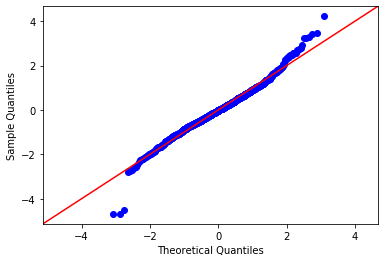

In [57]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid

# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45') 

# 꼬리부분에서 조금 정규분포를 띄지않는데 y=x 꼴을 보여야 정규성을 띄는 것 
# 근데 실제 데이터는 그렇게 되긴 힘들고 꼬리부분이 약간 곡선형태를 띄고있는게 일반적

Text(0, 0.5, 'Residual')

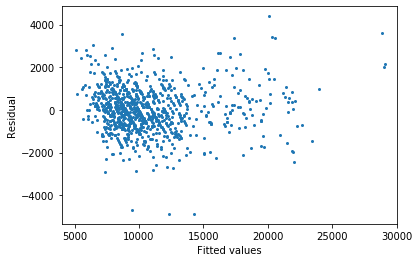

In [59]:
# residual pattern 확인
pred_y = fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y, res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

'''
잔차들이 y의 예측값에 따라 어떤 형태를 보이고있진않아, 조금 몰려있긴하지만
앞서봤던 결과와 마찬가지로 잔차가 균등하게 나와있다고 볼 수 있음
'''

In [60]:
## 검증 데이터에 대한 예측 
pred_y2 = fitted_full_model.predict(test_x) 

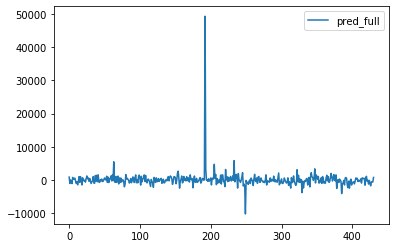

In [61]:
## 잔차 plot
plt.plot(np.array(test_y-pred_y2),label="pred_full")
plt.legend()
plt.show()

# 제일 위로 솟아있는 데이터 빼고는 어느정도 잘 맞음

In [68]:
from sklearn.metrics import mean_squared_error

In [70]:
## MSE 성능
mean_squared_error(y_true=test_y, y_pred=pred_y2)

7059343.7571156

# 변수선택법

In [74]:
def processSubset(X, y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F45874F240>, 'AIC': 19020.935278295176}


In [73]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1f4581cce48>,
 'AIC': 16885.259333405527}

In [76]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X, y, k): # k는 변수의 수
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 상수항 제외한 k개의 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const']) # combo와 다시 상수항 추가해
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 1.1893258094787598 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17556.4
Name: 211, dtype: object


C:\Users\hyun\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  del sys.path[0]


In [77]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [78]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x, y=train_y, k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

C:\Users\hyun\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  del sys.path[0]


Processed  36 models on 1 predictors in 0.09947776794433594 seconds.
Processed  630 models on 2 predictors in 2.1233880519866943 seconds.
Processed  7140 models on 3 predictors in 20.550618410110474 seconds.
Total elapsed time: 23.148828506469727 seconds.


In [79]:
models
# 3개의 변수를 고려한 게 AIC가 가장 낮다고 나옴

,AIC,model
1,17855.080386,<statsmodels.regression.linear_model.Regressio...
2,17556.400289,<statsmodels.regression.linear_model.Regressio...
3,17361.851619,<statsmodels.regression.linear_model.Regressio...


In [80]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     2023.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:16:55   Log-Likelihood:                -8676.9
No. Observations:                1005   AIC:                         1.736e+04
Df Residuals:                    1001   BIC:                         1.738e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mfg_Year    1670.7581     33.274     50.211      0.000    1605.462    1736.054
Petrol      3105.1706    173.438     17.904      0.000    2764.827    3445.515
Weight        30.0904      1.202     25.026      0.000      27.731      32.450
const      -3.365e+06   6.58e+04    -51.105      0.000   -3.49e+06   -3.24e+06
==============================================================================
Omnibus:                      278.655   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4164.201
Skew:                          -0.845   Prob(JB):                         0.00
Kurtosis:                      12.828   Cond. No.                     3.48e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

# 변수 3개 고려한 것보다 모든 변수들 고려해서 모델링한게 AIC가 가장 낮지
# AIC가 일반적으로 모델을 선택할때 가장 많이 보는 성능지표

full model Rsquared:  0.91700
full model AIC:  16885.25933
full model MSE:  13066784.52595
selected model Rsquared:  0.85843
selected model AIC:  17361.85162
selected model MSE:  13066784.52595


C:\Users\hyun\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  if sys.path[0] == '':
C:\Users\hyun\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
C:\Users\hyun\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.a

Text(0, 0.5, 'BIC')

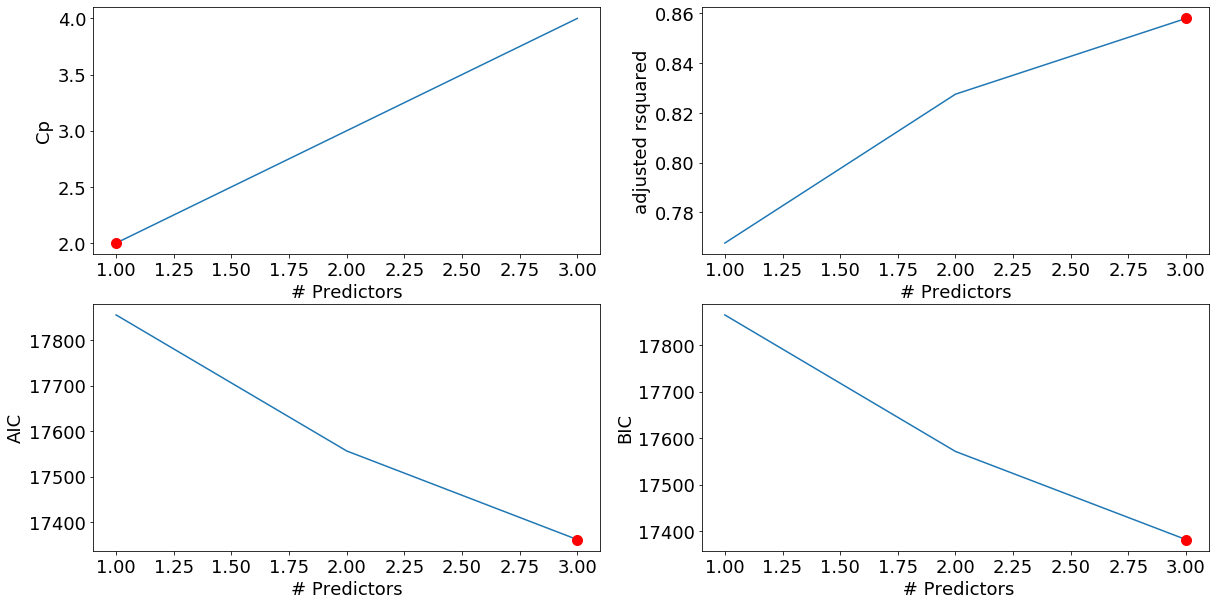

In [82]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
# 강의시간에 얘기안했지만 Cp도 AIC나 BIC처럼 sse를 가지고 만든 성능지표
# sse 값과 그에 따른 파라미터 수 만큼 패널티를 주는 성능지표
Cp = models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# Cp도 낮으면 낮을 수록 좋은데 여기선 predictor가 1개인 경우가 가장 낮게 나왔지 
# 전체적으로 Cp를 제외하고 변수를 1개에서 3개로 증가시켰을 때 모델이 더 좋다는 걸 알 수 있음

# 전진선택법

In [86]:
'''
모든 변수를 다 고려할 수 없어서 나온게 변수선택법
그 안에 전진선택법, 후진소거법, stepwise가 있다
'''
########전진선택법(step=1)
# 남아있는 변수들 중에 어떤 변수 쓰는게 가장 낮은 AIC를 찾는 것인가

def forward(X, y, predictors): # predictors는 현재 선택되어있는 변수들
    # 데이터 변수들이 미리 정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    # 지금 한 게 변수가 4개중에 첫번째 선택할 변수를 찾아야겠지
    # 1개가 선택됐으면 나머지 3개의 변수(그게 remaining_predictors)에 대해서 하나씩 추가 해보면서 모델 비교해서 AIC 낮은거 선택
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y=y, feature_set=predictors+[p]+['const'])) # p번째 predictor와 상수항 추가
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [87]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors) # forward 함수를 통해 나오는게 하나의 모델임
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before: # Fmodel_bofre는 이전에 선택된 모델의 AIC
                break # AIC가 변수 추가했을 때 갑자기 증가했으면 break, 현재 만들어져있는 Forward_best_model을 반환
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [88]:
Forward_best_model = forward_model(X=train_x, y=train_y)

# 3개의 변수 모두 다 고려한 것보다 시간이 짧아졌지

C:\Users\hyun\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Processed  36 models on 1 predictors in 0.1800246238708496
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F457F21BA8>
Processed  35 models on 2 predictors in 0.1776876449584961
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F457F217F0>
Processed  34 models on 3 predictors in 0.1299724578857422
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F457F267F0>
Processed  33 models on 4 predictors in 0.14491748809814453
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F457F37CC0>
Processed  32 models on 5 predictors in 0.1380016803741455
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'W

In [89]:
Forward_best_model.aic

16867.70779743314

In [90]:
Forward_best_model.summary()

# 선택된 변수들 보면 이전에 약간 문제가 되는 것 같다고 인식한 'Age_08_04'이 제거된 것을 알 수 있지

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     490.8
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:35:02   Log-Likelihood:                -8410.9
No. Observations:                1005   AIC:                         1.687e+04
Df Residuals:                     982   BIC:                         1.698e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1377.3040     45.937     29.982      0.000    1287.157    1467.450
Automatic_airco   2480.5821    192.900     12.859      0.000    2102.038    2859.126
HP                  40.9544      3.056     13.399      0.000      34.956      46.952
Weight              15.0057      1.244     12.062      0.000      12.564      17.447
KM                  -0.0149      0.001    -11.823      0.000      -0.017      -0.012
Powered_Windows    403.1221     84.196      4.788      0.000     237.897     568.347
cc                  -3.3881      0.336    -10.090      0.000      -4.047      -2.729
Quarterly_Tax       17.2455      1.767      9.762      0.000      13.779      20.712
Guarantee_Period    75.1011     13.740      5.466      0.000      48.139     102.064
CNG              -2669.3162    442.758     -6.029      0.000   -3538.177   -1800.456
BOVAG_Guarantee    624.5720    128.010      4.879      0.000     373.367     875.777
Boardcomputer     -350.7275    117.440     -2.986      0.003    -581.189    -120.266
Mfr_Guarantee      233.0160     72.821      3.200      0.001      90.113     375.919
Tow_Bar           -170.6126     77.048     -2.214      0.027    -321.810     -19.415
Airco              218.1919     86.737      2.516      0.012      47.981     388.403
Backseat_Divider  -338.8435    115.188     -2.942      0.003    -564.886    -112.801
CD_Player          199.8815     99.616      2.007      0.045       4.396     395.367
Sport_Model        148.2262     84.550      1.753      0.080     -17.693     314.145
Mfg_Month           19.4933     10.313      1.890      0.059      -0.745      39.731
ABS               -171.1031     97.827     -1.749      0.081    -363.077      20.871
Radio_cassette    -163.7853    103.621     -1.581      0.114    -367.130      39.559
Metallic_Rim       134.6017     87.806      1.533      0.126     -37.708     306.912
const             -2.76e+06   9.15e+04    -30.147      0.000   -2.94e+06   -2.58e+06
==============================================================================
Omnibus:                       47.723   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.133
Skew:                           0.016   Prob(JB):                     3.39e-34
Kurtosis:                       4.918   Cond. No.                     2.14e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 후진소거법

In [91]:
######## 후진소거법(step=1)
'''
모든 변수들 fitting 시킨 다음에 변수를 하나씩 하나씩 제거하면서
AIC가 높아지면 stop
feedforward랑 반대
'''

def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리 정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y=y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:', best_model['model'].model.exog_names,' AIC:', best_model[0] )
    return best_model

In [93]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const']) # 상수항을 뺀 모든 변수 fitting
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y=train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [94]:
Backward_best_model = backward_model(X=train_x,y=train_y)

C:\Users\hyun\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  app.launch_new_instance()


Processed  36 models on 35 predictors in 0.8068389892578125
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F4588AEDD8>
Processed  35 models on 34 predictors in 0.8523561954498291
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Mon

In [95]:
Backward_best_model.aic

16869.70627414054

In [96]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     468.9
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:42:38   Log-Likelihood:                -8410.9
No. Observations:                1005   AIC:                         1.687e+04
Df Residuals:                     981   BIC:                         1.699e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -170.8982     98.021     -1.743      0.082    -363.253      21.457
Airco              217.8966     87.118      2.501      0.013      46.937     388.856
Automatic_airco   2481.0785    193.427     12.827      0.000    2101.499    2860.658
BOVAG_Guarantee    624.5060    128.087      4.876      0.000     373.150     875.862
Backseat_Divider  -339.8402    118.110     -2.877      0.004    -571.617    -108.064
Boardcomputer     -350.5871    117.556     -2.982      0.003    -581.277    -119.897
CD_Player          199.7547     99.721      2.003      0.045       4.063     395.446
CNG              -5.487e+04   1801.902    -30.453      0.000   -5.84e+04   -5.13e+04
Cylinders        -6.372e+05   2.12e+04    -30.040      0.000   -6.79e+05   -5.96e+05
Diesel           -5.222e+04   1807.406    -28.890      0.000   -5.58e+04   -4.87e+04
Guarantee_Period    75.0805     13.757      5.458      0.000      48.084     102.077
HP                  40.7874      5.301      7.694      0.000      30.384      51.191
KM                  -0.0149      0.001    -11.659      0.000      -0.017      -0.012
Metallic_Rim       134.8754     88.137      1.530      0.126     -38.084     307.835
Mfg_Month           19.5069     10.324      1.889      0.059      -0.753      39.767
Mfg_Year          1377.4353     46.087     29.888      0.000    1286.996    1467.875
Mfr_Guarantee      232.8580     72.973      3.191      0.001      89.656     376.060
Petrol            -5.22e+04   1761.441    -29.634      0.000   -5.57e+04   -4.87e+04
Powered_Windows    402.8379     84.561      4.764      0.000     236.897     568.779
Quarterly_Tax       17.2791      1.970      8.770      0.000      13.413      21.145
Radio_cassette    -163.6545    103.729     -1.578      0.115    -367.212      39.903
Sport_Model        148.1443     84.620      1.751      0.080     -17.912     314.200
Tow_Bar           -170.9729     77.652     -2.202      0.028    -323.355     -18.591
Weight              15.0182      1.286     11.678      0.000      12.494      17.542
cc                  -3.3729      0.519     -6.504      0.000      -4.391      -2.355
const            -1.593e+05   5302.488    -30.040      0.000    -1.7e+05   -1.49e+05
==============================================================================
Omnibus:                       47.663   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.770
Skew:                           0.017   Prob(JB):                     4.07e-34
Kurtosis:                       4.916   Cond. No.                     1.33e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.44e-20. 

# 단계적 선택법

In [97]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        
        # forward 먼저 한 다음에 지울게 없는지 backward로 판단
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
            
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [98]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

# feedforward랑 backward를 번갈아 하기때문에 시간이 좀 더 걸릴 수 밖에없지

C:\Users\hyun\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
C:\Users\hyun\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  app.launch_new_instance()


Processed  36 models on 1 predictors in 0.2118833065032959
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F4581CFF28>
forward
Processed  1 models on 0 predictors in 0.011583805084228516
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F4096B5CF8>
Processed  35 models on 2 predictors in 0.2269906997680664
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F4581CF748>
forward
Processed  2 models on 1 predictors in 0.017546653747558594
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F4588BF390>
Processed  34 models on 3 predictors in 0.21421480178833008
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'const']  AIC: <statsmodels.regression.linear_model.Regr

Processed  15 models on 14 predictors in 0.0720977783203125
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'cc', 'Quarterly_Tax', 'Guarantee_Period', 'CNG', 'BOVAG_Guarantee', 'Boardcomputer', 'Mfr_Guarantee', 'Tow_Bar', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F4096BED68>
Processed  21 models on 16 predictors in 0.15819406509399414
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'cc', 'Quarterly_Tax', 'Guarantee_Period', 'CNG', 'BOVAG_Guarantee', 'Boardcomputer', 'Mfr_Guarantee', 'Tow_Bar', 'Airco', 'Backseat_Divider', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F4096BACC0>
forward
Processed  16 models on 15 predictors in 0.16118431091308594
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'cc', 'Quarterly_Tax', 'Guarantee_Period', 'CNG', 'BOVAG_

Processed  14 models on 23 predictors in 0.21917057037353516
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'cc', 'Quarterly_Tax', 'Guarantee_Period', 'CNG', 'BOVAG_Guarantee', 'Boardcomputer', 'Mfr_Guarantee', 'Tow_Bar', 'Airco', 'Backseat_Divider', 'CD_Player', 'Sport_Model', 'Mfg_Month', 'ABS', 'Radio_cassette', 'Metallic_Rim', 'Age_08_04', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F4588BC1D0>
forward
Processed  23 models on 22 predictors in 0.19273710250854492
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'cc', 'Quarterly_Tax', 'Guarantee_Period', 'CNG', 'BOVAG_Guarantee', 'Boardcomputer', 'Mfr_Guarantee', 'Tow_Bar', 'Airco', 'Backseat_Divider', 'CD_Player', 'Sport_Model', 'Mfg_Month', 'ABS', 'Radio_cassette', 'Metallic_Rim', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F4096B5C88>
backw

Processed  23 models on 22 predictors in 0.3356132507324219
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'cc', 'Quarterly_Tax', 'Guarantee_Period', 'CNG', 'BOVAG_Guarantee', 'Boardcomputer', 'Mfr_Guarantee', 'Tow_Bar', 'Airco', 'Backseat_Divider', 'CD_Player', 'Sport_Model', 'Mfg_Month', 'ABS', 'Radio_cassette', 'Metallic_Rim', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F4096BC208>
backward
Processed  14 models on 23 predictors in 0.22990131378173828
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'HP', 'Weight', 'KM', 'Powered_Windows', 'cc', 'Quarterly_Tax', 'Guarantee_Period', 'CNG', 'BOVAG_Guarantee', 'Boardcomputer', 'Mfr_Guarantee', 'Tow_Bar', 'Airco', 'Backseat_Divider', 'CD_Player', 'Sport_Model', 'Mfg_Month', 'ABS', 'Radio_cassette', 'Metallic_Rim', 'Age_08_04', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F4580CF550>
forwa

In [99]:
Stepwise_best_model.aic

16867.70779743314

# 성능평가 

In [100]:
# the number of params(선택된 파라미터 수)
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(23,) (26,) (23,)


In [102]:
Forward_best_model.model.exog_names

['Mfg_Year',
 'Automatic_airco',
 'HP',
 'Weight',
 'KM',
 'Powered_Windows',
 'cc',
 'Quarterly_Tax',
 'Guarantee_Period',
 'CNG',
 'BOVAG_Guarantee',
 'Boardcomputer',
 'Mfr_Guarantee',
 'Tow_Bar',
 'Airco',
 'Backseat_Divider',
 'CD_Player',
 'Sport_Model',
 'Mfg_Month',
 'ABS',
 'Radio_cassette',
 'Metallic_Rim',
 'const']

In [101]:
# 모델에 의해 예측된/추정된 값 <-> test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [103]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE', 'MAE', 'MAPE'])

In [104]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [105]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)


'''
만약 전체 다넣은 ALL의 MSE, RMSE가 변수선택법보다 낮게나오고
MAE와 MAPE는 변수선택법이 더 낮게나오는 이런 애매한 경우에서는
즉, 비슷한 성능일 경우에는 선택된 파라미터의 수가 더 적은데 더 best model ! 
'''

              ALL      FORWARD     BACKWARD     STEPWISE
MSE   7.05934e+06  6.87574e+06  6.82642e+06  6.87574e+06
RMSE      2656.94      2622.16      2612.74      2622.16
MAE       936.598      932.887      932.516      932.887
MAPE      8.73716       8.7016      8.70027       8.7016


In [106]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))

37
23
26
23


In [ ]:
'''
데이터 전처리하고 전체 변수 fitting해서 성능보고
어떤 변수가 제거하는게 나을지 판단 (단 도메인지식에 판단)
VIF를 통해 다중공선성 확인하면서 어떤 변수 지울필요가 있다/없다 판단
그 변수가 한두개 정도면 일일이 지울 필요가 있지만 그게 아니면 변수선택법 돌리는게 일반적
모델을 다 돌리고나서는 residual 꼭 확인 !! (y=x 꼴, 어느정도 잘 적합된 회귀모델이구나 판단)
최종적으론 validation data(검증데이터)에 대한 성능 꼭 확인하고 마지막으로 모델 선택
'''